In [1]:
import pandas as pd

training_file = 'training_data.csv'
data = pd.read_csv(training_file)

In [2]:
len(data)

199410

In [4]:
data.head()

,id,ad,link,timestamp,checkout,order_placed,grp,funnel_level
0,session446676598812,ad412316860435,link1288490188810,2018-04-30T14:39:22.000-04:00,1,1,grp936302870529,lower
1,session60129542152,ad584115552306,link1288490188810,2018-04-30T08:39:23.000-04:00,1,1,grp936302870529,lower
2,session1511828488251,ad1056561954841,link1288490188810,2018-04-30T17:24:01.000-04:00,1,1,grp936302870529,lower
3,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:42:57.000-04:00,1,1,grp936302870529,lower
4,session1142461300754,ad1666447310876,link1288490188810,2018-04-30T10:43:19.000-04:00,1,1,grp936302870529,lower


The data contains the following - 
ID		        : Session Id 
ad		        : ad clicked and then the Ad id – if its blank no ads clicked
Link		        : what are the interaction clicks done in the Web
timestamp	: what time the click was done by a customer in the session .
checkout	: if they added product and di checkout – 0 – No – 1- Yes
order_placed	: Order placed after checkout – 0 no – Yes - 1
grp		        : What group was the link  event part of  - (Grouping of all similar links that has same function)
funnel_level  	: what is the stage of the action click .

In [5]:
data.count()

id              199410
ad              120035
link            199410
timestamp       199410
checkout        199410
order_placed    199410
grp             199410
funnel_level    199410
dtype: int64

In [6]:
#add an empty string to the null values of the ad column
data['ad'] = data['ad'].fillna('0')

In [7]:
data['ad'].isnull().sum()

0

In [8]:
#convert ad to integer value by removing the ad from the value
data['ad'] = [int(i.replace('ad', '')) for i in data['ad']]

In [9]:
data['ad'].head()

0     412316860435
1     584115552306
2    1056561954841
3    1666447310876
4    1666447310876
Name: ad, dtype: int64

In [10]:
#convert other columns to integer similar to ad
data['id'] = [int(i.replace('session', '')) for i in data['id']]
data['link'] = [int(i.replace('link', '')) for i in data['link']]
data['grp'] = [int(i.replace('grp', '')) for i in data['grp']]

In [13]:
data['funnel_level'].value_counts()

upper     120772
middle     58282
lower      20356
Name: funnel_level, dtype: int64

In [15]:
#lets convert funnel_level to integer as follows - 
#upper = 1
#middle = 0
#lower = -1
d= {'upper' : 1, 'middle' : 0, 'lower' : -1}
data['funnel_level'] = data['funnel_level'].apply(lambda x:d[x])

In [16]:
#verify the data
data['funnel_level'].value_counts()

 1    120772
 0     58282
-1     20356
Name: funnel_level, dtype: int64

In [19]:
#lets convert timestamp string to float as follows - 
#method to convert a single timestamp string to float
import datetime
def getTime(timestamp):
	str = timestamp.split('T')
	date = str[0].split('-')
	time = (str[1].split('-')[0]).split(':')
	timeFloat = (datetime.datetime(int(date[0]), int(date[1]), int(date[2]), int(time[0]), int(time[1]), int(float(time[2])))).timestamp()
	return float(timeFloat)

In [20]:
#convert timestam strings to float value
data['timestamp'] = [getTime(i) for i in data['timestamp']]

In [22]:
#verify the conversion
data['timestamp'].value_counts()

1.525085e+09    19
1.525072e+09    18
1.525066e+09    17
1.525086e+09    17
1.525105e+09    16
1.525066e+09    16
1.525071e+09    16
1.525085e+09    16
1.525057e+09    15
1.525064e+09    15
1.525078e+09    15
1.525079e+09    15
1.525064e+09    15
1.525077e+09    15
1.525086e+09    15
1.525082e+09    15
1.525072e+09    15
1.525098e+09    15
1.525094e+09    15
1.525078e+09    15
1.525060e+09    15
1.525094e+09    15
1.525070e+09    14
1.525084e+09    14
1.525094e+09    14
1.525077e+09    14
1.525073e+09    14
1.525075e+09    14
1.525084e+09    14
1.525077e+09    14
                ..
1.525054e+09     1
1.525072e+09     1
1.525105e+09     1
1.525045e+09     1
1.525067e+09     1
1.525094e+09     1
1.525105e+09     1
1.525031e+09     1
1.525050e+09     1
1.525092e+09     1
1.525063e+09     1
1.525042e+09     1
1.525049e+09     1
1.525028e+09     1
1.525104e+09     1
1.525044e+09     1
1.525103e+09     1
1.525111e+09     1
1.525073e+09     1
1.525051e+09     1
1.525054e+09     1
1.525057e+09

In [23]:
#just to confirm
data.count()

id              199410
ad              199410
link            199410
timestamp       199410
checkout        199410
order_placed    199410
grp             199410
funnel_level    199410
dtype: int64

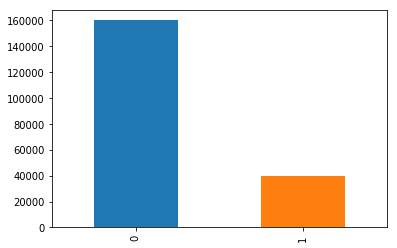

In [24]:
#lets analyze the values of order placed
%matplotlib inline

alpha_color = 0.5

data['order_placed'].value_counts().plot(kind='bar')

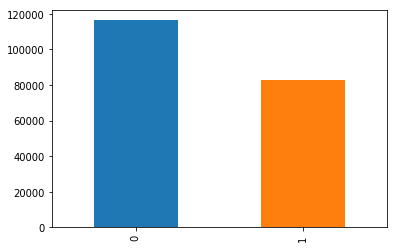

In [25]:
data['checkout'].value_counts().plot(kind='bar')

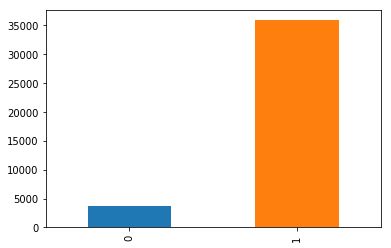

In [27]:
data[data['order_placed'] == 1]['checkout'].value_counts().sort_index().plot(kind = 'bar')

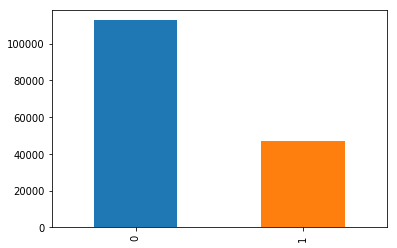

In [28]:
data[data['order_placed'] == 0]['checkout'].value_counts().sort_index().plot(kind = 'bar')

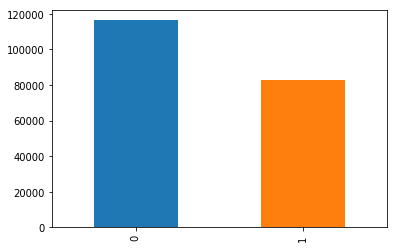

In [29]:
data['checkout'].value_counts().plot(kind='bar')

In [31]:
data['checkout'].value_counts()

0    116350
1     83060
Name: checkout, dtype: int64

In [32]:
data[data['order_placed'] == 0]['checkout'].value_counts()

0    112654
1     47242
Name: checkout, dtype: int64

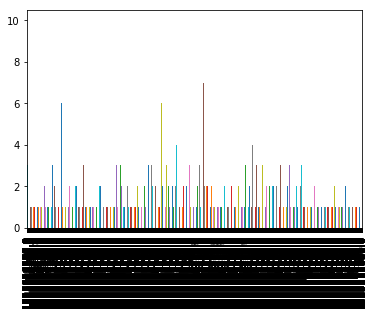

In [33]:
data[data['order_placed'] == 1]['timestamp'].value_counts().sort_index().plot(kind = 'bar')

In [36]:
data['timestamp'].max(), data['timestamp'].min()

(1525112993.0, 1525026600.0)

In [37]:
data['timestamp'] = data['timestamp']%1525000000

In [38]:
data['timestamp'].max(), data['timestamp'].min()

(112993.0, 26600.0)

In [39]:
data['timestamp'] = data['timestamp']%100000

In [40]:
data['timestamp'].max(), data['timestamp'].min()

(99999.0, 0.0)

In [42]:
bins = [0.0, 10000.0, 20000.0, 30000.0, 40000.0, 50000.0, 60000.0, 70000.0, 80000.0, 90000.0, 100000.0]

data['timestampBin'] = pd.cut(data['timestamp'], bins)

In [43]:
data['timestampBin'].value_counts()

(70000.0, 80000.0]     39770
(80000.0, 90000.0]     37597
(60000.0, 70000.0]     34640
(90000.0, 100000.0]    34223
(0.0, 10000.0]         28047
(50000.0, 60000.0]     11427
(10000.0, 20000.0]      4535
(30000.0, 40000.0]      3724
(40000.0, 50000.0]      2840
(20000.0, 30000.0]      2605
Name: timestampBin, dtype: int64

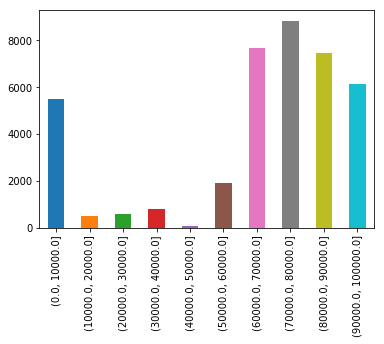

In [44]:
data[data['order_placed'] == 1]['timestampBin'].value_counts().sort_index().plot(kind = 'bar')

#so we conclude that timestamp plays a great role in ordering. 
#people are more likely to order in evenings

In [57]:
#to verify the details
data['timestamp'] = pd.read_csv(training_file)['timestamp']

In [53]:
#lets check how many days are there
data['day'] = [i.split('T')[0] for i in date]

In [55]:
data['day'].value_counts()
#so all the data is from the same date

2018-04-30    199410
Name: day, dtype: int64

In [60]:
data['dayTime'] = [i.split('T')[1].split(':')[0] for i in data['timestamp']]

In [62]:
data['dayTime'].value_counts()

14    14457
11    14406
12    14350
13    14250
16    13907
15    13350
17    12665
18    12352
10    12058
20    12037
19    12011
21    10929
09     9170
22     8723
23     6037
08     5678
07     3148
00     2724
01     1763
06     1441
02     1227
05     1148
03      834
04      745
Name: dayTime, dtype: int64

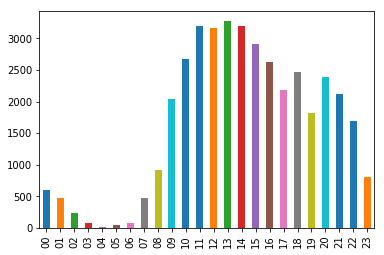

In [63]:
data[data['order_placed'] == 1]['dayTime'].value_counts().sort_index().plot(kind = 'bar')

#from the below graph we can conclude that most of the orders are not placed between midnight and early morning

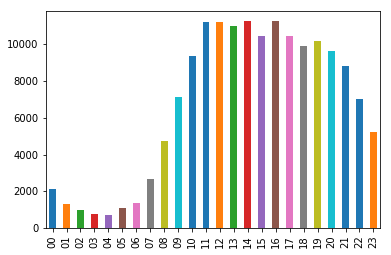

In [64]:
data[data['order_placed'] == 0]['dayTime'].value_counts().sort_index().plot(kind = 'bar')

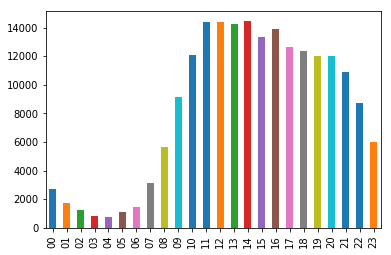

In [65]:
data['dayTime'].value_counts().sort_index().plot(kind = 'bar')


#so timestamp doesn't really say much  about the order placed or not 

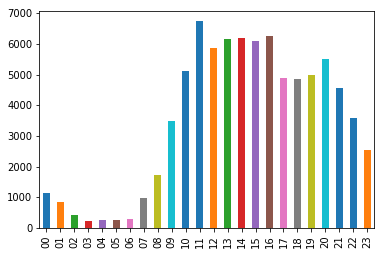

In [66]:
#lets check if it is having any effect on the checkout 
data[data['checkout'] == 1]['dayTime'].value_counts().sort_index().plot(kind = 'bar')

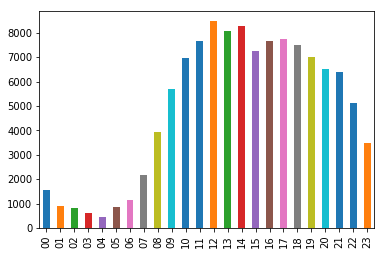

In [67]:
data[data['checkout'] == 0]['dayTime'].value_counts().sort_index().plot(kind = 'bar')

#again its same.. thus we conclude that the timestamp is not a useful variable

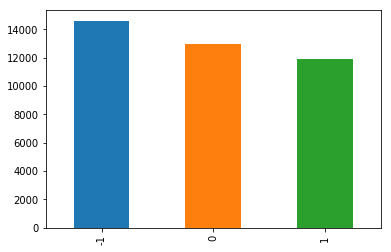

In [68]:
data[data['order_placed'] == 1]['funnel_level'].value_counts().sort_index().plot(kind = 'bar')

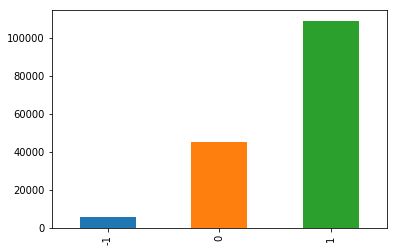

In [69]:
data[data['order_placed'] == 0]['funnel_level'].value_counts().sort_index().plot(kind = 'bar')

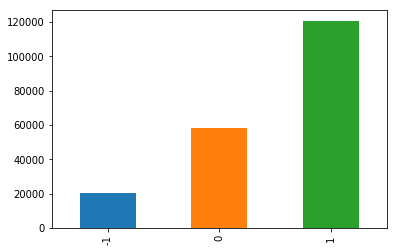

In [70]:
data['funnel_level'].value_counts().sort_index().plot(kind = 'bar')


# the impact of this variable is less but it can be considered for training the model even though it tells less

In [78]:
# get the number of groups in the data set
len(data['grp'].value_counts())

108

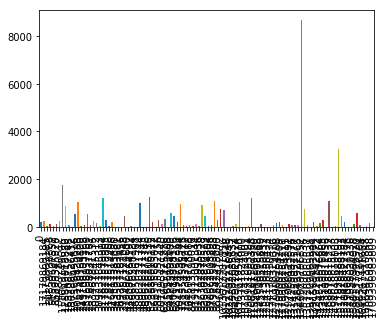

In [73]:
data[data['order_placed'] == 1]['grp'].value_counts().sort_index().plot(kind = 'bar')

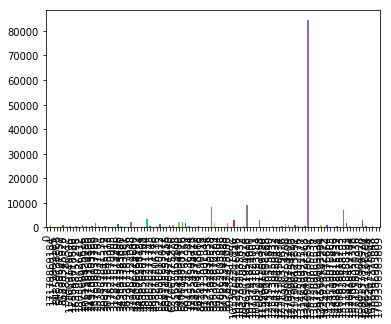

In [74]:
data[data['order_placed'] ==0]['grp'].value_counts().sort_index().plot(kind = 'bar')

#Grp is not helping very little in classifying the data, so it can be used in with combination with others

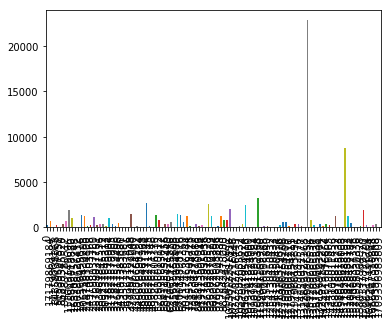

In [79]:
#lets check if group affects checkout
data[data['checkout'] == 1]['grp'].value_counts().sort_index().plot(kind = 'bar')

#its same as for order_placed

So, link , ad and id are very sparse data so i am not plotting them up
However, from the details, link can be ignored as it is part of the group that is already been considered for training the model
Ad can be used for training the model